<img src="https://openenergyplatform.github.io/academy/data/img/rlilogo.png" alt="OpenEnergy Platform" height="50" width="50" align="left"/>


# RLI Tutorial

This tutorial uses package _iplantuml_ for plotting UMLs

Installation:
* install java: `sudo apt-get install default-jre graphviz`
* download _plantuml.jar_ from http://plantuml.com/ and put it into _/usr/local/bin_
* install package: `pip install iplantuml`
* `import iplantuml`
* done

Visit http://plantuml.com/ as UML-code reference <br>
Additional literature: <br>
https://sourcemaking.com/design_patterns/mediator <br>
https://de.wikipedia.org/wiki/Business_Process_Model_and_Notation <br>
http://www.vertabelo.com/blog/technical-articles/chen-erd-notation <br>

In [1]:
import iplantuml

# UML Workshop

The following UML diagrams will be explained in the following:
1. Database diagrams (ERM)
1. Class diagrams
1. Activity diagrams 

# Database UMLs (Entity-Relationship-Model [ERM])
A very nice and easy to understand schema is called _chen-notation_.
Nice overview can be found here: http://www.vertabelo.com/blog/technical-articles/chen-erd-notation
The most important components will be discussed in the following.

Common components are:

## Entities

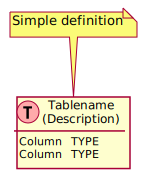

In [2]:
%%plantuml --jar

@startuml
'ERM definitions:
skinparam tabSize 2
sprite $key [17x12/16z] bOqv3e1030CJRzPn9Fx_NWY7n4eqJ3TJs6OVa5pTpD-5tl3YyFHG-4DsqAOnWgawWp0r0KGagDuGMYMJxbMrBxzLPJ_O0G00
!define Table(name,desc) class name as "desc" << (T,#FFAAAA) >>
!define primary_key(x) <$key><b>x</b>
!define foreign_key(x) <$key>x
!define unique <b>U</b>
!define not_null <b>N</b> 
hide methods
hide stereotypes
                                                  
Table(t, "Tablename\n(Description)") {
    Column \t TYPE
    Column \t TYPE
}
note top of t: Simple definition
                                                  
@enduml

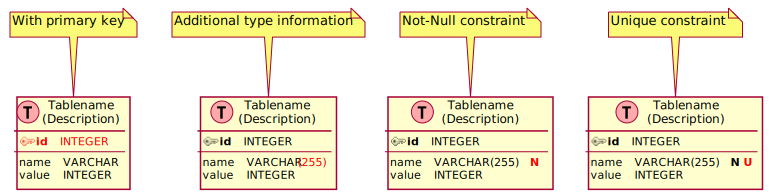

In [3]:
%%plantuml --jar

@startuml
'ERM definitions:
skinparam tabSize 2
sprite $key [17x12/16z] bOqv3e1030CJRzPn9Fx_NWY7n4eqJ3TJs6OVa5pTpD-5tl3YyFHG-4DsqAOnWgawWp0r0KGagDuGMYMJxbMrBxzLPJ_O0G00
!define Table(name,desc) class name as "desc" << (T,#FFAAAA) >>
!define primary_key(x) <$key><b>x</b>
!define foreign_key(x) <$key>x
!define unique <b>U</b>
!define not_null <b>N</b> 
hide methods
hide stereotypes
                                                  
Table(t1, "Tablename\n(Description)") {
    <color:red>primary_key(id) \t INTEGER</color>
    --
    name \t VARCHAR
    value \t INTEGER
}
note top of t1: With primary key
                                                  
Table(t2, "Tablename\n(Description)") {
    primary_key(id) \t INTEGER
    --
    name \t VARCHAR<color:red>(255)</color>
    value \t INTEGER
}
note top of t2: Additional type information

Table(t3, "Tablename\n(Description)") {
    primary_key(id) \t INTEGER
    --
    name \t VARCHAR(255) \t <color:red>not_null</color>
    value \t INTEGER
}
note top of t3: Not-Null constraint
                                                  
Table(t4, "Tablename\n(Description)") {
    primary_key(id) \t INTEGER
    --
    name \t VARCHAR(255) \t not_null<color:red>unique</color>
    value \t INTEGER
}
note top of t4: Unique constraint
@enduml

## Relationships

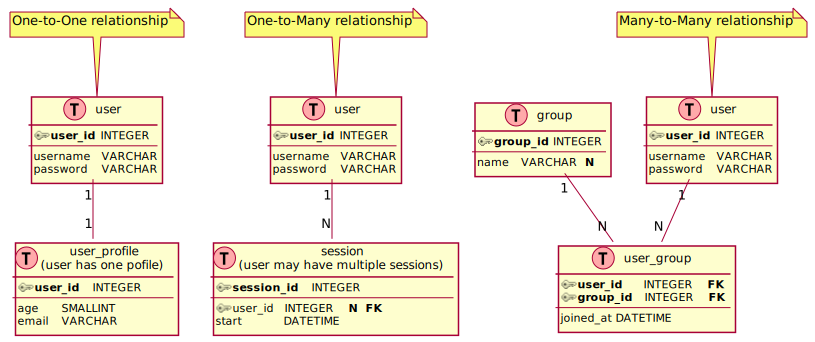

In [4]:
%%plantuml --jar

@startuml
'ERM definitions:
skinparam tabSize 2
sprite $key [17x12/16z] bOqv3e1030CJRzPn9Fx_NWY7n4eqJ3TJs6OVa5pTpD-5tl3YyFHG-4DsqAOnWgawWp0r0KGagDuGMYMJxbMrBxzLPJ_O0G00
!define Table(name,desc) class name as "desc" << (T,#FFAAAA) >>
!define primary_key(x) <$key><b>x</b>
!define foreign_key(x) <$key>x
!define unique <b>U</b>
!define not_null <b>N</b> 
!define foreign <b>FK</b> 
hide methods
hide stereotypes
       
'One-to-one'
Table(user, "user") {
primary_key(user_id) INTEGER
--
username \t VARCHAR
password \t VARCHAR
}
note top of user : One-to-One relationship

Table(user_profile, "user_profile\n(user has one pofile)") {
primary_key(user_id) \t INTEGER
--
age \t\t SMALLINT
email \t VARCHAR
}

user "1" -- "1" user_profile   

'One-to-many'                                                  
Table(user2, "user") {
primary_key(user_id) INTEGER
--
username \t VARCHAR
password \t VARCHAR
}
note top of user2 : One-to-Many relationship

Table(session, "session\n(user may have multiple sessions)") {
primary_key(session_id) \t INTEGER
--
foreign_key(user_id) \t INTEGER \t not_null foreign
start \t\t\t\t\t DATETIME
}

user2 "1" -- "N" session
                                                
'Many-to-many'
Table(user3, "user") {
primary_key(user_id) INTEGER
--
username \t VARCHAR
password \t VARCHAR
}
note top of user3 : Many-to-Many relationship
                                                  
Table(group, "group") {
primary_key(group_id) INTEGER
--
name \t VARCHAR \t not_null
}

Table(user_group, "user_group") {
primary_key(user_id) \t\t INTEGER \t foreign
primary_key(group_id) \t INTEGER \t foreign
--
joined_at DATETIME
}

user3 "1" -- "N" user_group
group "1" -- "N" user_group 
@enduml

## Code example

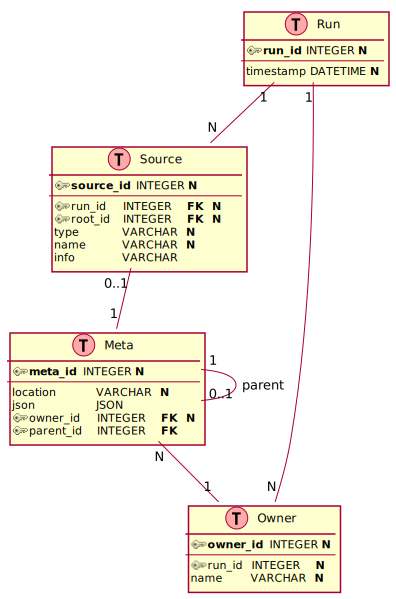

In [5]:
%%plantuml --jar

@startuml
'ERM definitions:
skinparam tabSize 2
sprite $key [17x12/16z] bOqv3e1030CJRzPn9Fx_NWY7n4eqJ3TJs6OVa5pTpD-5tl3YyFHG-4DsqAOnWgawWp0r0KGagDuGMYMJxbMrBxzLPJ_O0G00
!define Table(name,desc) class name as "desc" << (T,#FFAAAA) >>
!define primary_key(x) <$key><b>x</b>
!define foreign_key(x) <$key>x
!define unique <b>U</b>
!define not_null <b>N</b> 
!define foreign <b>FK</b> 
hide methods
hide stereotypes
                                                  
Table(run, "Run") {
    primary_key(run_id) INTEGER not_null
    --
    timestamp DATETIME not_null
}
Table(meta, "Meta") {
    primary_key(meta_id) INTEGER not_null
    --
    location \t\t\t\t VARCHAR \t not_null
    json \t\t\t\t\t\t\t JSON
    foreign_key(owner_id) \t\t INTEGER \t foreign not_null
    foreign_key(parent_id) \t INTEGER \t foreign
}
Table(source, "Source") {
    primary_key(source_id) INTEGER not_null
    --
    foreign_key(run_id) \t\t INTEGER \t foreign not_null
    foreign_key(root_id) \t INTEGER \t foreign not_null \t
    type \t\t\t\t\t VARCHAR \t not_null
    name \t\t\t\t VARCHAR \t not_null
    info \t\t\t\t\t VARCHAR
} 
Table(owner, "Owner") {
    primary_key(owner_id) INTEGER not_null
    --
    foreign_key(run_id) \t INTEGER \t not_null
    name \t\t\t VARCHAR \t not_null
}

run "1" -- "N" source
run "1" -- "N" owner
source "0..1" -- "1" meta
meta "1" -- "0..1" meta : parent
meta "N" -- "1" owner
@enduml

In [6]:
import datetime as dt
import sqlalchemy as sqla
from sqlalchemy.orm import relationship
from sqlalchemy.ext.declarative import declarative_base

Base = declarative_base()

SCHEMA = 'public'


class Run(Base):
    __tablename__ = 'run'
    __table_args__ = {'schema': SCHEMA}

    run_id = sqla.Column(
        sqla.Integer,
        primary_key=True
    )
    timestamp = sqla.Column(sqla.DateTime, default=dt.datetime.utcnow)
    sources = relationship("Source", back_populates='run')
    owners = relationship("Owner", back_populates='run')


class Meta(Base):
    __tablename__ = 'meta'
    __table_args__ = {'schema': SCHEMA}

    meta_id = sqla.Column(
        sqla.Integer,
        primary_key=True
    )
    location = sqla.Column(
        sqla.VARCHAR,
    )
    json = sqla.Column(
        sqla.JSON,
        nullable=True
    )
    owner_id = sqla.Column(
        sqla.ForeignKey(f'{SCHEMA}.owner.owner_id')
    )
    owner = relationship("Owner", back_populates="metas")
    parent_id = sqla.Column(
        sqla.Integer, sqla.ForeignKey(f'{SCHEMA}.meta.meta_id'), nullable=True)
    children = relationship('Meta')


class Source(Base):
    __tablename__ = 'source'
    __table_args__ = {'schema': SCHEMA}

    source_id = sqla.Column(
        sqla.Integer,
        primary_key=True
    )
    run_id = sqla.Column(
        sqla.ForeignKey(f'{SCHEMA}.run.run_id')
    )
    run = relationship("Run", back_populates="sources")
    root_id = sqla.Column(sqla.ForeignKey(f'{SCHEMA}.meta.meta_id'))
    root = relationship("Meta", uselist=False)
    type = sqla.Column(sqla.VARCHAR)
    name = sqla.Column(sqla.VARCHAR)
    info = sqla.Column(sqla.VARCHAR, nullable=True)


class Owner(Base):
    __tablename__ = 'owner'
    __table_args__ = {'schema': SCHEMA}

    owner_id = sqla.Column(
        sqla.Integer,
        primary_key=True
    )
    run_id = sqla.Column(sqla.ForeignKey(f'{SCHEMA}.run.run_id'))
    run = relationship("Run", uselist=False, back_populates='owners')
    name = sqla.Column(
        sqla.VARCHAR
    )
    metas = relationship("Meta", back_populates='owner')

# Class diagrams
## Class definition

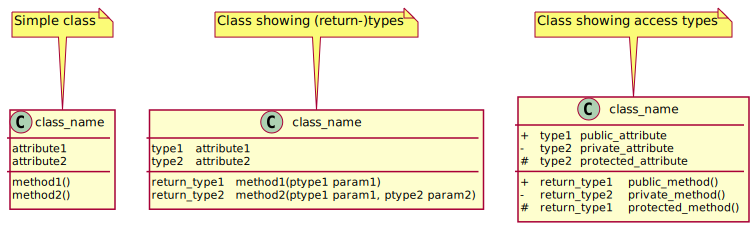

In [7]:
%%plantuml --jar

@startuml
skinparam classAttributeIconSize 0
skinparam tabSize 2
class "class_name" as c1 {
    attribute1
    attribute2
    method1()
    method2()
}
note top of c1 : Simple class

class "class_name" as c2 {
    type1 \t attribute1
    type2 \t attribute2
    return_type1 \t method1(ptype1 param1)
    return_type2 \t method2(ptype1 param1, ptype2 param2)
}
note top of c2 : Class showing (return-)types

class "class_name" as c3 {
    + \t type1 \t public_attribute
    - \t\t type2 \t private_attribute
    # \t type2 \t protected_attribute
    + \t return_type1 \t public_method()
    - \t\t return_type2 \t private_method()
    # \t return_type1 \t protected_method()
}
note top of c3 : Class showing access types
@enduml

## Relations between classes

Typical relations between classes
* Extension: Shows inheritance between classes
* Assoziation: Objects are somehow related (loose)
* Aggregation: Object can contain other object
* Composition: The child object __can not__ exist without the parent object

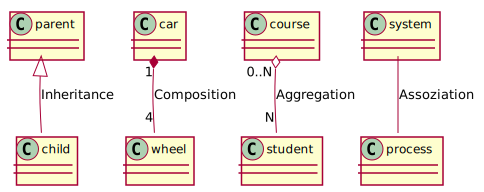

In [8]:
%%plantuml --jar

@startuml
parent <|-- child : Inheritance
car "1" *-- "4" wheel : Composition
course "0..N" o-- "N" student : Aggregation
system -- process : Assoziation
@enduml

## Code example
From: https://sourcemaking.com/design_patterns/strategy/python/1

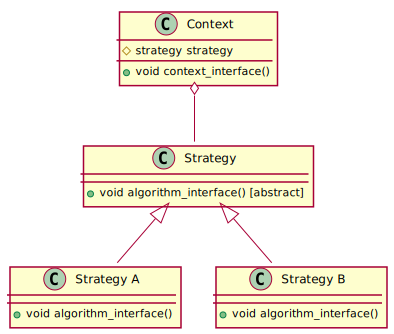

In [9]:
%%plantuml --jar

@startuml
class "Context" as context {
    # strategy strategy
    + void context_interface()
}
class "Strategy" as strategy {
    + void algorithm_interface() [abstract]
}
class "Strategy A" as strategy1 {
    + void algorithm_interface()
}
class "Strategy B" as strategy2 {
    + void algorithm_interface()
}
context o-- strategy
strategy <|-- strategy1
strategy <|-- strategy2
@enduml

In [10]:
class Context:
    """
    Define the interface of interest to clients.
    Maintain a reference to a Strategy object.
    """

    def __init__(self, strategy):
        self._strategy = strategy

    def context_interface(self):
        self._strategy.algorithm_interface()


class Strategy(metaclass=abc.ABCMeta):
    """
    Declare an interface common to all supported algorithms. Context
    uses this interface to call the algorithm defined by a
    ConcreteStrategy.
    """

    @abc.abstractmethod
    def algorithm_interface(self):
        pass


class ConcreteStrategyA(Strategy):
    """
    Implement the algorithm using the Strategy interface.
    """

    def algorithm_interface(self):
        pass


class ConcreteStrategyB(Strategy):
    """
    Implement the algorithm using the Strategy interface.
    """

    def algorithm_interface(self):
        pass


def main():
    concrete_strategy_a = ConcreteStrategyA()
    context = Context(concrete_strategy_a)
    context.context_interface()


if __name__ == "__main__":
    main()
    

NameError: name 'abc' is not defined

# Activity diagram

In [ ]:
%%plantuml --jar

@startuml
partition simple_method {
start
note left: Start
:action1;
:action2;
stop
note left: End
}

partition conditional_method {
start
if (check?) then (yes)
  :action1;
else (no)
  :action2;
endif
stop
}

partition forks_and_merges {
    start
    fork
    :fork1;
    fork again
    :fork2.1;
    :fork2.2;
    fork again
    :fork3;
    end
    note right: Terminates this branch
    end fork
    note left: Merge
    stop
}

partition simple_object {
    start
    : Set value to 1;
    :value=1]
    note left: Show current object
    stop
}

:input]
partition function {
    :Set value to five times input;
    :value=input*5]
    :Return value;
}
:value]
@enduml

## Code example

In [ ]:
%%plantuml --jar

@startuml

partition login {
start
:logged_in=False]
:User enters name and password;
if (Password correct?) then (yes)
:login;
:logged_in=True]
else (no)
:Show "Invalid password";
endif
}
:logged_in]

@enduml

In [ ]:
def login():
    logged_in = False
    name = input("Name")
    password = input("Password")  # Please do this safely in real functions!
    if password == "123456":
        logged_in = True
    else:
        print("Invalid password")
    return logged_in

login()